<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/LLAMA4_AWS_APRIL2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Information

* The Llama 4 collection of models are natively multimodal AI models that enable text and multimodal experiences. These models leverage a mixture-of-experts architecture to offer industry-leading performance in text and image understanding.

* These Llama 4 models mark the beginning of a new era for the Llama ecosystem. We are launching two efficient models in the Llama 4 series, Llama 4 Scout, a 17 billion parameter model with 16 experts, and Llama 4 Maverick, a 17 billion parameter model with 128 experts.

* Model developer: Meta

* Model Architecture: The Llama 4 models are auto-regressive language models that use a mixture-of-experts (MoE) architecture and incorporate early fusion for native multimodality.

* Model Name	Training Data	Params	Input modalities	Output modalities	Context length	Token count	Knowledge cutoff
Llama 4 Scout (17Bx16E)	A mix of publicly available, licensed data and information from Meta’s products and services. This includes publicly shared posts from Instagram and Facebook and people’s interactions with Meta AI. Learn more in our Privacy Center.	17B (Activated) 109B (Total)	Multilingual text and image	Multilingual text and code	10M	~40T	August 2024
Llama 4 Maverick (17Bx128E)		17B (Activated) 400B (Total)	Multilingual text and image	Multilingual text and code	1M	~22T	August 2024
Supported languages: Arabic, English, French, German, Hindi, Indonesian, Italian, Portuguese, Spanish, Tagalog, Thai, and Vietnamese.

* Model Release Date: April 5, 2025

* Status: This is a static model trained on an offline dataset. Future versions of the tuned models may be released as we improve model behavior with community feedback.

https://studio-d-yesr9g64bv2p.studio.us-east-1.sagemaker.aws/jumpstart/SageMakerPublicHub/Model/meta-vlm-llama-4-scout-17b-16e-instruct

In [ ]:
!pip install colab-env --quiet

!pip install sagemaker boto3 --quiet

%pip install langchain --quiet

In [ ]:
import colab_env
import os
aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
region=os.getenv("AWS_DEFAULT_REGION")
output=os.getenv("AWS_DEFAULT_OUTPUT")

#print(aws_access_key_id)
#print()
#print(f"aws_access_key_id: '{aws_access_key_id}'")
#print(f"aws_secret_access_key: '{aws_secret_access_key}'")

#print(f"region: '{region}'")
#print()

In [2]:
import boto3
import sagemaker
import json
import os
from sagemaker.jumpstart.model import JumpStartModel

iam_client = boto3.client("iam")

role = iam_client.get_role(
    RoleName=os.getenv("ROLENAME")
)

ROLE_ARN = role['Role']['Arn']


from sagemaker.jumpstart.model import JumpStartModel

#'ml.p5.48xlarge for endpoint usage
llm_model_id = "meta-vlm-llama-4-scout-17b-16e-instruct"
llm_model = JumpStartModel(model_id=llm_model_id, env={"MAX_SEQ_LEN": "1048576"}, role=ROLE_ARN, region='us-east-1')
llm_predictor = llm_model.deploy(accept_eula=True)

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


Using model 'meta-vlm-llama-4-scout-17b-16e-instruct' with wildcard version identifier '*'. You can pin to version '1.0.0' for more stable results. Note that models may have different input/output signatures after a major version upgrade.


-------------!

In [3]:
#this is the model endpoint NAME, not the ARN
llm_model_endpoint_name = llm_predictor.endpoint_name
llm_model_endpoint_name

'meta-vlm-llama-4-scout-17b-16e-instruct-2025-04-10-19-14-01-606'

In [7]:
####  CASE#1
import json
#query = "who is the best French Poet?"
query = "Write a program to compute factorial in python:"

# Create a boto3 client for SageMaker runtime
sm_client = boto3.client('runtime.sagemaker')

### WITH PARAMETRS
n=5
MNT=512*n
model_kwargs={"max_new_tokens": MNT, "temperature": 0.9}
input_data = {
    "messages": [{"role": "user", "content": query}], # Simplified to only user message
    "parameters" : {**model_kwargs}
}

response = sm_client.invoke_endpoint(EndpointName=llm_model_endpoint_name, Body=json.dumps(input_data), ContentType="application/json")

# Decode the response from the model
response_body = json.loads(response['Body'].read().decode('utf-8'))
#print(response_body)

print(f'Query #1:', query)
print('\n')

# Extract the content from the response
if 'choices' in response_body and response_body['choices'] and 'message' in response_body['choices'][0] and 'content' in response_body['choices'][0]['message']:
    generated_text = response_body['choices'][0]['message']['content']
    print(f'Response #1:', generated_text)
    print('\n')
else:
    print("Unexpected response format:", response_body)

Query #1: Write a program to compute factorial in python:


Response #1: **Computing Factorial in Python**

### Overview

The factorial of a non-negative integer `n`, denoted by `n!`, is the product of all positive integers less than or equal to `n`.

### Code

```python
def factorial(n):
    """
    Compute the factorial of a non-negative integer.

    Args:
        n (int): A non-negative integer.

    Returns:
        int: The factorial of n.

    Raises:
        ValueError: If n is a negative integer.
    """
    if not isinstance(n, int):
        raise TypeError("Input must be an integer.")
    if n < 0:
        raise ValueError("Input must be a non-negative integer.")
    elif n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n-1)

# Example usage:
def main():
    num = 5
    try:
        result = factorial(num)
        print(f"The factorial of {num} is {result}.")
    except (TypeError, ValueError) as e:
        print(e)

if __name__ == "__main__":
    ma

In [8]:
####  CASE#2
import json

query = "I bought an ice cream for 6 kids. Each cone was $1.25 and I paid with a $10 bill. How many dollars did I get back? Explain first before answering."


# Create a boto3 client for SageMaker runtime
sm_client = boto3.client('runtime.sagemaker')

### WITH PARAMETRS
n=5
MNT=512*n
model_kwargs={"max_new_tokens": MNT, "temperature": 0.9}
input_data = {
    "messages": [{"role": "user", "content": query}], # Simplified to only user message
    "parameters" : {**model_kwargs}
}

response = sm_client.invoke_endpoint(EndpointName=llm_model_endpoint_name, Body=json.dumps(input_data), ContentType="application/json")

# Decode the response from the model
response_body = json.loads(response['Body'].read().decode('utf-8'))
#print(response_body)

print(f'Query #1:', query)
print('\n')

# Extract the content from the response
if 'choices' in response_body and response_body['choices'] and 'message' in response_body['choices'][0] and 'content' in response_body['choices'][0]['message']:
    generated_text = response_body['choices'][0]['message']['content']
    print(f'Response #1:', generated_text)
    print('\n')
else:
    print("Unexpected response format:", response_body)

Query #1: I bought an ice cream for 6 kids. Each cone was $1.25 and I paid with a $10 bill. How many dollars did I get back? Explain first before answering.


Response #1: To find out how much change you got back, we need to calculate the total cost of the ice cream cones and then subtract that from the $10 bill you paid with.

First, let's calculate the total cost of the ice cream cones:
You bought 6 cones at $1.25 each, so we multiply the number of cones by the cost per cone:
6 cones x $1.25 per cone = 6 x 1.25 = $7.50

Now, we subtract the total cost from the $10 bill:
$10 (bill) - $7.50 (total cost) = $2.50

So, you got $2.50 back as change.

The answer is: $2.50




In [ ]:
## CASE#3

import colab_env
import os
import matplotlib.pyplot as plt
import cv2
import urllib.request
import urllib
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import IPython
import pytz
from datetime import datetime
import json
from pathlib import Path


def chat_gpt_vision(image_url):
    # Prepare the input for the model, including the image URL and the prompt
    input_data = {
        "chat_completion": {
            "messages": [{"role": "user", "content": f"Describe the image: {image_url}"}],
            "parameters": {
                "max_new_tokens": 256,  # Adjust as needed
                "temperature": 0.7      # Adjust as needed
            }
        }
    }

    # Send the request to the SageMaker endpoint
    response = sm_client.invoke_endpoint(
        EndpointName=llm_model_endpoint_name,
        Body=json.dumps(input_data),
        ContentType="application/json"
    )

    # Decode and return the model's response
    response_body = json.loads(response['Body'].read().decode('utf-8'))
    return response_body.get('generated_text', '')  # Handle potential missing key


# Nature
prompt =  "What’s in this image?"
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

print()
print('The image url is here: %s'%image_url)

nature="/content/gdrive/MyDrive/datasets/Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
print()

testim = cv2.imread(nature)
plt.imshow(testim)
plt.show()
print()

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
description = chat_gpt_vision(image_url)
print(description)


## turing award recipient ########
prompt =  "Describe the image?"
image_url = "https://awards.acm.org/binaries/content/gallery/acm/ctas/awards/turing-2018-bengio-hinton-lecun.jpg"
#url="https://awards.acm.org/binaries/content/gallery/acm/ctas/awards/turing-2018-bengio-hinton-lecun.jpg"

print()
print('The image of the 2018 Turing Award recipients is here: %s'%image_url)
print()

award="/content/gdrive/MyDrive/datasets/turing-2018-bengio-hinton-lecun.jpg"
testim = cv2.imread(award)
plt.imshow(testim)
plt.show()
print()

description = chat_gpt_vision(image_url)
print(description)

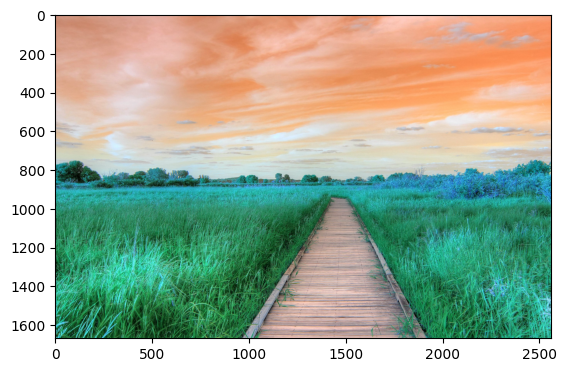



The image url is here: https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg
The image is a photograph of a scenic boardwalk, likely taken at the University of Wisconsin-Madison's University Arboretum or a similar natural setting.

Here's a detailed description:

* The boardwalk, made of wooden planks, stretches into the distance, curving slightly to the right. It's elevated above a marshy or wetland area, with a railing on the right side.
* The surrounding environment is lush and green, with tall trees, including what appear to be deciduous and evergreen species, lining the boardwalk. The foliage is dense, with some trees having broad canopies.
* In the foreground, there are some plants with long, thin leaves, possibly cattails or similar wetland vegetation, growing near the boardwalk.
* The sky above is not visible, as the photo is taken from a low angle, looking down the boardw

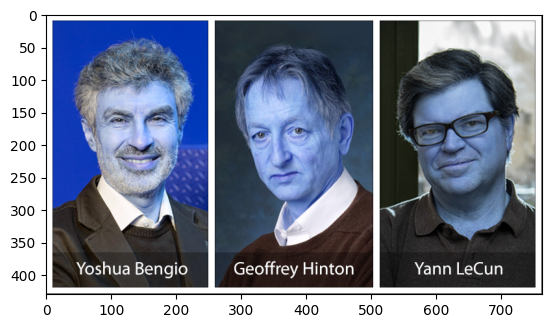



The image of the 2018 Turing Award recipients is here: https://awards.acm.org/binaries/content/gallery/acm/ctas/awards/turing-2018-bengio-hinton-lecun.jpg


The image is a photograph of three men, likely taken at a formal event. 

The men in the image are:

1. Yoshua Bengio
2. Geoffrey Hinton 
3. Yann LeCun.

They are all smiling and appear to be in a celebratory mood. The occasion is likely the 2018 ACM A.M. Turing Award ceremony, as indicated by the context of the image. The three men are notable figures in the field of artificial intelligence and deep learning. 

They are all dressed in formal attire, with Bengio and LeCun wearing black tuxedos and Hinton wearing a dark suit with a white shirt and a black bow tie. 

The image conveys a sense of camaraderie and achievement among the three award recipients.


In [15]:
import colab_env
import os
import boto3
import sagemaker
import json
import matplotlib.pyplot as plt
import cv2


# Create a boto3 client for SageMaker runtime
sm_client = boto3.client('runtime.sagemaker')

# Function for image description
def chat_gpt_vision(image_url):
    input_data = {
        "messages": [{"role": "user", "content": f"Describe the image: {image_url}"}],
        "parameters": {
            "max_new_tokens": 256,
            "temperature": 0.7
        }
    }
    response = sm_client.invoke_endpoint(
        EndpointName=llm_model_endpoint_name,
        Body=json.dumps(input_data),
        ContentType="application/json"
    )
    response_body = json.loads(response['Body'].read().decode('utf-8'))
    return response_body['choices'][0]['message']['content']  # Extract content

# Example usage with image URLs

# Nature image
nature="/content/gdrive/MyDrive/datasets/Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
print('\n')
testim = cv2.imread(nature)
plt.imshow(testim)
plt.show()
print('\n')

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
print('The image url is here:', image_url)
description = chat_gpt_vision(image_url)
print(description)
print('\n')



# Turing Award recipients image
award="/content/gdrive/MyDrive/datasets/turing-2018-bengio-hinton-lecun.jpg"
testim = cv2.imread(award)
plt.imshow(testim)
plt.show()
print('\n')

image_url = "https://awards.acm.org/binaries/content/gallery/acm/ctas/awards/turing-2018-bengio-hinton-lecun.jpg"
print('The image of the 2018 Turing Award recipients is here:', image_url)
print('\n')
description = chat_gpt_vision(image_url)
print(description)


# CLEAN UP

In [16]:
#  Frank Morales created this cell on December 14, 2023; it fully allows automatically the deletion of endpoints, models, and endpoint configurations.

import colab_env
import os

aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
aws_region=os.getenv("AWS_DEFAULT_REGION")
aws_output=os.getenv("AWS_DEFAULT_OUTPUT")

import boto3

sagemaker_client = boto3.client('sagemaker', region_name=aws_region)

def cleanup_sagemaker_resources(resource_name,resourceid):

    if resourceid==0:
       response=sagemaker_client.list_endpoints()
    elif resourceid==1:
         response=sagemaker_client.list_models()
    elif resourceid==2:
         response=sagemaker_client.list_endpoint_configs()

    print(resource_name)

    number_of_endpoints=len(response['%s'%resource_name])
    for i in range(number_of_endpoints):
        resource_nametmp='%s'%resource_name[0:len(resource_name)-1]
        print('%sName'%resource_nametmp)
        print(response['%s'%resource_name][i]['%sName'%resource_nametmp])

        if resourceid==0:
           endpoint_name=response['%s'%resource_name][i]['%sName'%resource_nametmp]
           sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
        elif resourceid==1:
           sagemaker_client.delete_model(ModelName=response['Models'][i]['ModelName'])
        elif resourceid==2:
           sagemaker_client.delete_endpoint_config(EndpointConfigName=response['EndpointConfigs'][i]['EndpointConfigName'])

    print("\n==================================\n")


cleanup_sagemaker_resources('Endpoints',0)
cleanup_sagemaker_resources('Models',1)
cleanup_sagemaker_resources('EndpointConfigs',2)

Endpoints
EndpointName
meta-vlm-llama-4-scout-17b-16e-instruct-2025-04-10-19-14-01-606


Models
ModelName
meta-vlm-llama-4-scout-17b-16e-instruct-2025-04-10-19-14-01-604


EndpointConfigs
EndpointConfigName
meta-vlm-llama-4-scout-17b-16e-instruct-2025-04-10-19-14-01-606


